In [13]:
import DataReader
import imp
imp.reload(DataReader)

outcomes_clean = DataReader.DataReader.get_checkpoint_outcomes('continuous', 'seed=1', 'epoch=60.ckpt')
# outcomes_adv = DataReader.DataReader.get_checkpoint_outcomes('dreaming_frequency_30', 'seed=2', 'epoch=39_success_rate=0.76.ckpt')
outcomes_adv = DataReader.DataReader.get_checkpoint_outcomes('dreaming_uptrain_reg_freeze', 'seed=1', 'epoch=99_success_rate=0.72.ckpt')

In [14]:
continuous_counts, continuous_models = DataReader.DataReader.get_experiment_success_counts('continuous')
# dreaming_counts, dreaming_models = DataReader.DataReader.get_experiment_success_counts('dreaming_frequency_30')
dreaming_counts, dreaming_models = DataReader.DataReader.get_experiment_success_counts('dreaming_lbfgs')

values_clean = continuous_counts / continuous_models
# values_adv = get_success_counts('offroad_power4_4')
values_adv = dreaming_counts / dreaming_models
# values_adv = get_success_counts('dreaming_3_z_updates_each_time')

values_clean = outcomes_clean
values_adv = outcomes_adv

(array([ 37.,   0.,   0.,   0.,   0., 458.,   0.,   0.,   0.,  66.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

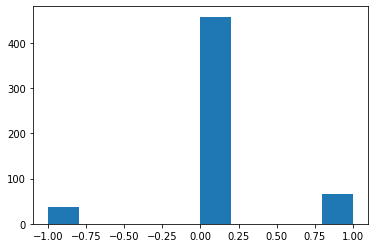

In [15]:
from matplotlib import pyplot as plt
import numpy as np
plt.hist(values_clean - values_adv)

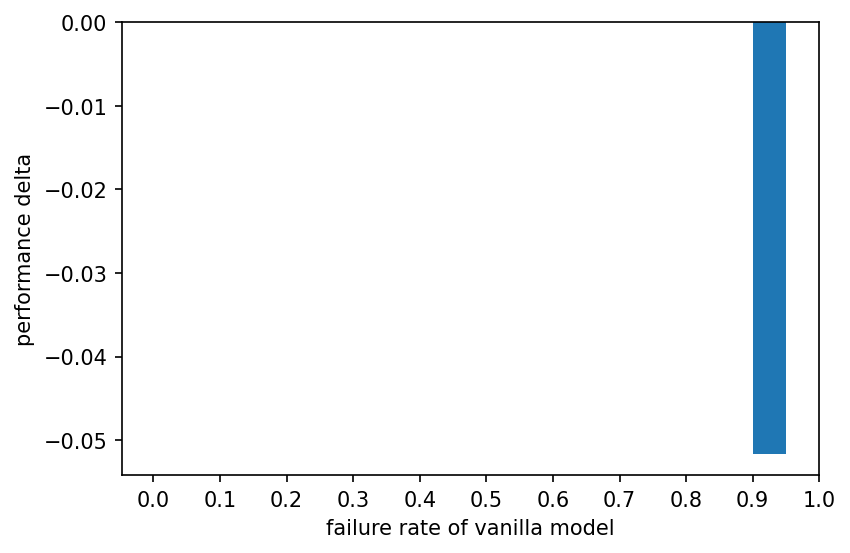

In [16]:
def plot_by_ranking(ranking, success_rates_change, title='', xlabel=''):
    n_buckets = 10
    lo, hi = 0, 1
    if max(ranking) > 1:
        lo, hi = -3, 3
    buckets = np.linspace(lo, hi, n_buckets + 1)
    bucket_values = [[0] for i in range(n_buckets)]
    for r, change in zip(ranking, success_rates_change):
        index = np.searchsorted(buckets, r) - 1
        bucket_values[index].append(change)
    means = np.array([np.mean(x) for x in bucket_values])
    plt.figure(dpi=150)
    plt.bar(buckets[:-1], means, align='edge', width=(hi - lo) / n_buckets / 2)
    plt.xticks(buckets)
    plt.ylabel('performance delta')
    plt.xlabel(xlabel)
    plt.title(title)

plot_by_ranking((1 - values_clean), values_adv - values_clean, xlabel='failure rate of vanilla model')

In [17]:
action_norms = np.array([0.25067943, 0.24248098, 0.33256674, 0.480358  , 0.35088083,
       0.466606  , 0.22991249, 0.30757377, 0.48121345, 0.39226142,
       0.35441235, 0.5444545 , 0.41215682, 0.5961243 , 0.27771083,
       0.25201145, 0.3753584 , 0.33726472, 0.32848886, 0.46411085,
       0.39008385, 0.3930648 , 0.35408768, 0.2482147 , 0.29718265,
       0.55363274, 0.5321693 , 0.24982385, 0.25601506, 0.35309884,
       0.46351627, 0.403526  , 0.39497426, 0.51321983, 0.26239285,
       0.30301642, 0.65478075, 0.37120947, 0.5339172 , 0.25210008,
       0.6964368 , 0.4727743 , 0.36766723, 0.53950995, 0.5086058 ,
       0.11464154, 0.20709282, 0.25767177, 0.30669606, 0.31160733,
       0.43027794, 0.296218  , 0.45732427, 0.37547436, 0.5063441 ,
       0.209519  , 0.71813434, 0.71975327, 0.5695117 , 0.36965218,
       0.29934922, 0.35479426, 0.325892  , 0.37281582, 0.5061777 ,
       0.21642475, 0.36606073, 0.3178988 , 0.39505443, 0.29138723,
       0.48478156, 0.24502233, 0.31906936, 0.28743196, 0.79217845,
       0.45928106, 0.42738312, 0.49539545, 0.28644976, 0.47418246,
       0.28606415, 0.6137016 , 0.46364415, 0.7162278 , 0.33682442,
       0.2869009 , 0.3615887 , 0.31199703, 0.41203272, 0.36174527,
       0.35485   , 0.44751608, 0.30328435, 0.32508308, 0.5811379 ,
       0.31460288, 0.2142581 , 0.20085374, 0.17862856, 0.53939515,
       0.38194287, 0.3042845 , 0.50203556, 0.41858816, 0.32062808,
       0.27737677, 0.25798064, 0.29457048, 0.25827047, 0.39617717,
       0.33709374, 0.20275505, 0.84415495, 0.32563758, 0.3401899 ,
       0.38990802, 0.36229888, 0.31352547, 0.458828  , 0.31124488,
       0.30220747, 0.27982512, 0.39091167, 0.44252804, 0.44910875,
       0.24200346, 0.2987573 , 0.34579358, 0.37776703, 0.32828677,
       0.46224368, 0.4184165 , 0.3438296 , 0.30796015, 0.3408731 ,
       0.35649145, 0.5392045 , 0.26618186, 0.5087925 , 0.42775095,
       0.30545104, 0.35853603, 0.27468944, 0.45257238, 0.39945278,
       0.52850014, 0.23884949, 0.38469374, 0.33762914, 0.46177587,
       0.4739409 , 0.34788772, 0.3456905 , 0.29124776, 0.23825274,
       0.31509912, 0.2241974 , 0.3756345 , 0.31444618, 0.2625508 ,
       0.3469435 , 0.36218864, 0.21335664, 0.62001544, 0.48474553,
       0.34800535, 0.34787607, 0.510653  , 0.27056447, 0.27995333,
       0.18901096, 0.4019074 , 0.25874385, 0.4171238 , 0.49777877,
       0.22089945, 0.22642972, 0.5666458 , 0.51055545, 0.40622634,
       0.29470864, 0.36005837, 0.30968222, 0.12960908, 0.51913726,
       0.41591728, 0.22159594, 0.69803745, 0.3420766 , 0.23044878,
       0.4330098 , 0.2074417 , 0.23127902, 0.4824089 , 0.22340673,
       0.5793034 , 0.34178534, 0.27963567, 0.80331904, 0.21057203,
       0.36984155, 0.66182727, 0.36164367, 0.23939687, 0.32044637,
       0.47713527, 0.36035264, 0.3980125 , 0.3776497 , 0.45881873,
       0.3754839 , 0.29299214, 0.4792393 , 0.47498542, 0.4685277 ,
       0.2940064 , 0.43924102, 0.36786148, 0.33643627, 0.2998028 ,
       0.30081275, 0.3842496 , 0.44094738, 0.44420663, 0.34380203,
       0.287728  , 0.2081726 , 0.300727  , 0.42107776, 0.5845672 ,
       0.24659418, 0.36624646, 0.24748474, 0.3729025 , 0.37954763,
       0.22207224, 0.23290716, 0.33267242, 0.2808016 , 0.4844698 ,
       0.252085  , 0.5481547 , 0.589161  , 0.57925594, 0.34342262,
       0.37092546, 0.6669337 , 0.4293531 , 0.4477752 , 0.45800492,
       0.5088145 , 0.25840023, 0.60583496, 0.32942748, 0.27749583,
       0.5321649 , 0.25890082, 0.5683857 , 0.5800541 , 0.24040152,
       0.3476388 , 0.40998548, 0.330728  , 0.3669174 , 0.23040307,
       0.2851903 , 0.3374305 , 0.3995633 , 0.3162179 , 0.37092975,
       0.2771174 , 0.4419296 , 0.39132565, 0.1931968 , 0.3991676 ,
       0.35074282, 0.31147447, 0.4268007 , 0.29499072, 0.44227496,
       0.48275658, 0.34584442, 0.891531  , 0.36745116, 0.36579713,
       0.44867575, 0.24551542, 0.3780397 , 0.2526144 , 0.45446423,
       0.5841674 , 0.35828313, 0.2483585 , 0.48201445, 0.40013808,
       0.45391315, 0.24314475, 0.49299565, 0.3485877 , 0.3692832 ,
       0.7816902 , 0.25141636, 0.30168706, 0.4256403 , 0.21638015,
       1.        , 0.2636512 , 0.3662776 , 0.3493509 , 0.40686727,
       0.34562102, 0.62297344, 0.34230685, 0.4554564 , 0.21743634,
       0.3511022 , 0.3334756 , 0.18755145, 0.30715913, 0.3014853 ,
       0.23306534, 0.38284385, 0.40023065, 0.4011288 , 0.3554559 ,
       0.3027448 , 0.34670588, 0.3894065 , 0.28079307, 0.55804884,
       0.4138195 , 0.70656157, 0.3166029 , 0.43363342, 0.32698572,
       0.38449076, 0.19911052, 0.24728923, 0.9251801 , 0.34720296,
       0.43328893, 0.25468507, 0.4418531 , 0.20925142, 0.5107106 ,
       0.27966943, 0.47241142, 0.46789515, 0.524288  , 0.57734126,
       0.45568696, 0.22793445, 0.32924774, 0.261575  , 0.51609504,
       0.44509998, 0.52064866, 0.2929779 , 0.2542534 , 0.47973856,
       0.4155688 , 0.35184994, 0.46185476, 0.3788194 , 0.33586928,
       0.21071523, 0.356595  , 0.44650748, 0.45200232, 0.34078655,
       0.27226627, 0.377119  , 0.5227048 , 0.29176772, 0.2500565 ,
       0.29364097, 0.18835741, 0.2555271 , 0.39728823, 0.49972835,
       0.2646814 , 0.29579294, 0.26507497, 0.52625966, 0.4853159 ,
       0.4099657 , 0.4629247 , 0.33255303, 0.32194465, 0.4084991 ,
       0.29657504, 0.2654665 , 0.29197606, 0.30077663, 0.3674388 ,
       0.30242264, 0.2947444 , 0.29459968, 0.18043464, 0.18327905,
       0.66698277, 0.18613979, 0.35177603, 0.62799865, 0.30579197,
       0.37856522, 0.3698145 , 0.2616817 , 0.22392651, 0.28100133,
       0.31043336, 0.38101113, 0.36446232, 0.38033807, 0.2757811 ,
       0.40020445, 0.22642636, 0.6049552 , 0.26964226, 0.43425214,
       0.26612994, 0.30171967, 0.49394298, 0.3249975 , 0.17501602,
       0.21214838, 0.46375296, 0.39863107, 0.6122291 , 0.5356468 ,
       0.5315362 , 0.29384956, 0.39948192, 0.34301955, 0.21701433,
       0.60063607, 0.31198737, 0.4638924 , 0.44891828, 0.30779916,
       0.42337725, 0.1881849 , 0.13521971, 0.55016136, 0.24316828,
       0.30083072, 0.18919511, 0.37978548, 0.34234107, 0.28925282,
       0.38494837, 0.62383145, 0.29643953, 0.32118723, 0.33074334,
       0.20636027, 0.27738443, 0.33136022, 0.44147345, 0.350172  ,
       0.30245355, 0.22630191, 0.3891798 , 0.32772067, 0.4150162 ,
       0.32995716, 0.2696978 , 0.1851938 , 0.27849782, 0.29999885,
       0.40951625, 0.19901106, 0.5569339 , 0.40589374, 0.30898637,
       0.44047529, 0.29023835, 0.6438762 , 0.4314874 , 0.41427904,
       0.4671351 , 0.21989381, 0.30545035, 0.29251784, 0.23017764,
       0.23705323, 0.22207522, 0.3401472 , 0.36074615, 0.44950834,
       0.2136458 , 0.42167598, 0.65172124, 0.66202825, 0.15495282,
       0.47140273, 0.7063128 , 0.25487095, 0.3216752 , 0.4031398 ,
       0.2506013 , 0.34968063, 0.3895581 , 0.23641846, 0.26515386,
       0.22270761, 0.36491627, 0.4845916 , 0.60731065, 0.27463531,
       0.20960264, 0.25001588, 0.3664014 , 0.2701469 , 0.50636286,
       0.47514942, 0.49948844, 0.35806087, 0.287177  , 0.4136938 ,
       0.75910926, 0.47536457, 0.34062377, 0.3394882 , 0.30578455,
       0.35621417, 0.74569213, 0.6098249 , 0.4050231 , 0.23304   ,
       0.26842427, 0.3454361 , 0.37522808, 0.23497532, 0.71505934,
       0.6452127 , 0.32204142, 0.38573295, 0.19494887, 0.50445485,
       0.42697167, 0.18920478, 0.36205974, 0.4014382 , 0.33700892,
       0.52005345, 0.3465692 , 0.3718686 , 0.37930965, 0.29318455,
       0.29319838, 0.62004036, 0.4355256 , 0.535448  , 0.39669803,
       0.32259488, 0.5907801 , 0.30401266, 0.275021  , 0.23823543,
       0.28305304])
cost_norms = np.array([4.13319856e-01, 2.41956681e-01, 2.28899837e-01, 1.63402751e-01,
       5.97071707e-01, 1.94746822e-01, 4.70885724e-01, 4.35544699e-01,
       3.05792779e-01, 5.99905133e-01, 1.44517660e-01, 5.07024348e-01,
       2.60857135e-01, 2.77215779e-01, 1.84403002e-01, 6.35276854e-01,
       3.24269325e-01, 2.33095020e-01, 4.32885617e-01, 4.93226975e-01,
       4.54507351e-01, 6.23000145e-01, 2.80505925e-01, 0.00000000e+00,
       2.85070032e-01, 2.91887581e-01, 3.23378086e-01, 1.14746846e-01,
       4.10203040e-01, 3.43289047e-01, 2.27786005e-01, 4.00761425e-01,
       3.57347131e-01, 2.21058324e-01, 4.01990950e-01, 1.89735070e-02,
       1.02909453e-01, 4.08821106e-01, 2.58272383e-02, 1.80082500e-01,
       3.43667388e-01, 1.36903867e-01, 6.62775517e-01, 3.94335866e-01,
       3.64199936e-01, 3.25292796e-01, 1.31557614e-01, 5.15907109e-01,
       3.12197715e-01, 3.17110330e-01, 3.12798768e-01, 2.80967027e-01,
       3.78607661e-01, 1.76137298e-01, 3.29057842e-01, 1.22722358e-01,
       4.46970254e-01, 2.41282403e-01, 0.00000000e+00, 8.02526101e-02,
       4.88801152e-01, 2.02701673e-01, 4.83949512e-01, 5.31416871e-02,
       1.07169621e-01, 0.00000000e+00, 2.00685337e-01, 2.20945925e-02,
       2.80788494e-03, 2.24127889e-01, 4.90578562e-01, 3.23653549e-01,
       2.41900414e-01, 2.87708849e-01, 2.22122982e-01, 1.26255035e-01,
       1.72772780e-01, 5.46764612e-01, 2.30886266e-01, 8.44703913e-02,
       4.93307590e-01, 3.79067510e-01, 4.34531540e-01, 2.90262401e-01,
       4.68213320e-01, 2.06454471e-01, 4.02384609e-01, 3.00980210e-01,
       3.17286015e-01, 5.26052892e-01, 2.74921864e-01, 2.18330398e-01,
       3.19450527e-01, 4.33925718e-01, 3.01230580e-01, 3.31037104e-01,
       3.04768920e-01, 1.48721531e-01, 1.81267351e-01, 2.15972796e-01,
       3.41613889e-01, 1.72114491e-01, 3.90012771e-01, 4.51358974e-01,
       5.63201047e-02, 2.26684526e-01, 2.69938242e-02, 2.25453731e-03,
       3.76847148e-01, 3.68353903e-01, 5.13868749e-01, 5.57876885e-01,
       6.60271049e-01, 1.47740453e-01, 2.26553902e-01, 3.81159365e-01,
       2.21869126e-02, 8.04317743e-02, 4.66259032e-01, 2.77807087e-01,
       1.06511056e-01, 3.23193163e-01, 1.74003094e-01, 3.15669537e-01,
       2.73799598e-01, 2.16830492e-01, 2.82422334e-01, 4.68468189e-01,
       3.97137076e-01, 4.19919282e-01, 4.91948009e-01, 5.78200221e-01,
       3.28898042e-01, 3.07057738e-01, 3.35574269e-01, 3.88233691e-01,
       2.33832926e-01, 2.83155978e-01, 4.98687290e-02, 8.22316408e-01,
       3.41726303e-01, 8.57509613e-01, 2.59280831e-01, 2.84924358e-01,
       3.52362603e-01, 4.57269460e-01, 4.32262383e-02, 3.93291622e-01,
       4.85471428e-05, 2.34912485e-01, 5.12966037e-01, 1.58385098e-01,
       2.06510395e-01, 8.22327733e-02, 4.99084555e-02, 5.17572127e-02,
       0.00000000e+00, 6.24107242e-01, 2.02295393e-01, 2.93523014e-01,
       1.80115074e-01, 5.46368100e-02, 1.07108139e-01, 4.94591296e-01,
       2.85774380e-01, 3.64509284e-01, 3.10127378e-01, 5.57602525e-01,
       1.80825703e-02, 5.25517106e-01, 2.50014709e-03, 7.52749801e-01,
       1.80513799e-01, 2.98053116e-01, 3.26078624e-01, 4.56379056e-02,
       3.93848687e-01, 2.22028613e-01, 3.41843367e-01, 3.49584758e-01,
       2.66479850e-01, 5.94148517e-01, 1.87619701e-01, 1.73914321e-02,
       6.08999208e-02, 5.24293482e-01, 3.64102796e-02, 5.40885746e-01,
       4.02098179e-01, 2.65904586e-03, 3.60457180e-03, 0.00000000e+00,
       5.05751789e-01, 8.32024992e-01, 1.80423707e-01, 4.37117815e-01,
       5.93761027e-01, 2.71110833e-01, 3.49290222e-01, 1.99605823e-01,
       4.21881109e-01, 7.54914463e-01, 3.18315327e-01, 1.77420527e-01,
       3.44666578e-02, 5.21239758e-01, 6.73877448e-02, 5.34264684e-01,
       3.88032734e-01, 1.64871305e-01, 4.65558231e-01, 2.12934762e-01,
       4.75724429e-01, 2.46882096e-01, 3.49758744e-01, 4.61274177e-01,
       1.30484924e-01, 2.05307081e-01, 1.34664461e-01, 3.43062311e-01,
       5.11361361e-01, 3.23117048e-01, 4.34463739e-01, 4.88658756e-01,
       3.74512672e-01, 2.51615882e-01, 3.32305819e-01, 5.66549785e-02,
       4.85215038e-01, 5.73899567e-01, 5.33064716e-02, 4.72471327e-01,
       4.08280604e-02, 4.00510430e-01, 2.85686791e-01, 6.50841743e-02,
       4.63671237e-01, 2.70807697e-03, 7.41111517e-01, 3.33416253e-01,
       3.75852510e-02, 4.38010752e-01, 3.81273746e-01, 5.07593572e-01,
       5.88258922e-01, 3.60086039e-02, 4.49254990e-01, 7.93790966e-02,
       2.08328277e-01, 6.01926625e-01, 1.19559176e-01, 4.50852692e-01,
       3.91959429e-01, 5.20395994e-01, 4.78532851e-01, 2.05862880e-01,
       3.95101607e-01, 5.41459441e-01, 2.34914705e-01, 1.59189358e-01,
       2.55751669e-01, 7.92251229e-01, 1.93734124e-01, 7.03882277e-02,
       5.14139384e-02, 3.07280481e-01, 2.66837534e-02, 1.33424759e-01,
       2.26250917e-01, 1.25632852e-01, 3.35029960e-01, 2.36619219e-01,
       9.60755274e-02, 1.45866618e-01, 3.84016782e-02, 9.58002955e-02,
       2.49558106e-01, 6.48479879e-01, 4.02025551e-01, 1.64771706e-01,
       5.18491030e-01, 4.39301908e-01, 3.69507223e-01, 1.82136402e-01,
       4.89407390e-01, 4.49046314e-01, 1.87609643e-01, 3.95205200e-01,
       3.63507450e-01, 3.56233954e-01, 2.50942975e-01, 1.71740428e-01,
       5.95985532e-01, 3.54717374e-01, 3.37965906e-01, 3.10771942e-01,
       4.44881469e-01, 4.80012655e-01, 1.38780093e-02, 3.98313522e-01,
       4.88539226e-02, 3.34091336e-01, 2.28439942e-01, 1.56937227e-01,
       5.23101389e-01, 2.72384137e-01, 3.19883287e-01, 2.84885257e-01,
       4.48283702e-01, 4.03725594e-01, 2.19186828e-01, 3.67719680e-01,
       4.45072979e-01, 3.31099659e-01, 1.61398515e-01, 7.21702635e-01,
       5.78113914e-01, 4.13565710e-03, 4.91097927e-01, 4.82187539e-01,
       1.98316470e-01, 5.01245022e-01, 6.58602919e-03, 8.37634146e-01,
       1.86061680e-01, 5.21514773e-01, 2.21908376e-01, 6.69395506e-01,
       5.02129018e-01, 1.57972485e-01, 2.83533812e-01, 1.47959307e-01,
       3.64647329e-01, 2.93137699e-01, 3.07568341e-01, 3.07504684e-01,
       6.89658662e-03, 1.77551836e-01, 3.55616540e-01, 1.23956114e-01,
       3.78928155e-01, 3.17298502e-01, 3.60550702e-01, 0.00000000e+00,
       5.31931579e-01, 2.98190236e-01, 4.04339850e-01, 6.41319633e-01,
       3.06552470e-01, 2.30378419e-01, 3.80561709e-01, 8.32755864e-02,
       4.00625288e-01, 3.72580498e-01, 1.26956508e-01, 1.06015079e-01,
       2.88016915e-01, 1.55200243e-01, 1.65244386e-01, 4.87738609e-01,
       3.79067540e-01, 4.40122545e-01, 5.41448355e-01, 4.91411924e-01,
       5.11298478e-01, 2.45748773e-01, 4.36665535e-01, 5.81288934e-01,
       1.55517474e-01, 4.23745155e-01, 1.70085460e-01, 2.47820780e-01,
       3.52288991e-01, 3.60024124e-01, 6.15634024e-01, 6.43252977e-04,
       0.00000000e+00, 2.87161529e-01, 1.59446195e-01, 2.13270530e-01,
       2.43526891e-01, 2.39295259e-01, 1.70644641e-01, 3.68471086e-01,
       1.08153917e-01, 2.49885470e-01, 9.93630663e-02, 3.89298290e-01,
       3.12696278e-01, 3.58477116e-01, 1.68291658e-01, 6.86420277e-02,
       6.36775270e-02, 3.66450608e-01, 2.64526188e-01, 7.51540512e-02,
       0.00000000e+00, 1.12434655e-01, 1.08610436e-01, 2.96551079e-01,
       5.09197712e-01, 3.36443245e-01, 5.43226242e-01, 2.27647826e-01,
       4.45033640e-01, 3.82113695e-01, 2.14610040e-01, 2.00564638e-01,
       1.63033918e-01, 1.33776795e-02, 0.00000000e+00, 7.85954893e-02,
       7.24801421e-01, 2.01215386e-01, 7.20734820e-02, 1.60837322e-01,
       3.71405989e-01, 3.39634776e-01, 0.00000000e+00, 4.08868670e-01,
       3.97374213e-01, 4.23232913e-02, 2.22249478e-01, 3.90998036e-01,
       8.49164575e-02, 6.05857968e-02, 3.09306651e-01, 2.28899166e-01,
       1.30268931e-01, 7.27628395e-02, 1.50754556e-01, 3.70754182e-01,
       2.59621948e-01, 6.09253049e-01, 4.23050106e-01, 1.00097649e-01,
       4.99338537e-01, 4.98595327e-01, 4.31941181e-01, 1.13787435e-01,
       5.20844720e-02, 0.00000000e+00, 3.91378924e-02, 2.26304397e-01,
       2.97094807e-02, 1.84937283e-01, 1.91671622e-03, 7.89711997e-02,
       3.95810395e-01, 1.76872194e-01, 3.84274304e-01, 4.85268772e-01,
       5.81953764e-01, 1.95388779e-01, 3.15229855e-02, 5.17392933e-01,
       2.51979291e-01, 5.48059583e-01, 1.62344307e-01, 1.67964995e-01,
       2.60584563e-01, 0.00000000e+00, 3.89730424e-01, 1.76882699e-01,
       1.00000000e+00, 2.90410042e-01, 3.80566269e-01, 6.26888990e-01,
       8.68235081e-02, 5.92786744e-02, 2.71414310e-01, 1.58943504e-01,
       1.48508817e-01, 3.64357382e-01, 1.90370426e-01, 6.54091239e-02,
       8.77691805e-02, 4.09580052e-01, 8.00642073e-01, 6.96835876e-01,
       3.70726317e-01, 1.33730605e-01, 4.84620370e-02, 2.53952593e-01,
       1.71349034e-01, 1.48902349e-02, 3.96865875e-01, 5.69847524e-01,
       2.09726706e-01, 1.29464179e-01, 9.81997177e-02, 2.91454524e-01,
       3.83625776e-01, 1.92851260e-01, 2.11574644e-01, 7.70131648e-01,
       5.96982539e-01, 2.43176103e-01, 4.75981295e-01, 1.08935252e-01,
       3.04639220e-01, 1.01672128e-01, 3.47024053e-01, 2.33662620e-01,
       6.58579230e-01, 3.04035306e-01, 1.65604323e-01, 2.70005286e-01,
       5.93724310e-01, 7.53115177e-01, 1.49607152e-01, 1.71843290e-01,
       3.92285213e-02, 5.07047633e-03, 3.11623991e-01, 5.02168596e-01,
       1.69075906e-01, 3.06789458e-01, 2.21450046e-01, 0.00000000e+00,
       4.09135103e-01, 7.41360307e-01, 3.20936650e-01, 2.37362921e-01,
       2.69545227e-01, 2.34970436e-01, 2.19607785e-01, 2.09784761e-01,
       1.22194715e-01, 1.04961574e-01, 1.75158218e-01, 3.03333938e-01,
       4.77405488e-01, 1.09907657e-01, 4.84747142e-01, 9.51469988e-02,
       2.33318359e-01, 3.90700966e-01, 1.30616069e-01, 1.55805424e-01,
       2.29007304e-01, 1.79297209e-01, 4.86773282e-01, 4.69142705e-01,
       4.89229918e-01, 1.07749298e-01, 6.20218158e-01, 2.90240675e-01,
       2.19504863e-01, 2.66276836e-01, 3.70059639e-01, 4.31315690e-01,
       1.88716754e-01, 2.71788299e-01, 3.16621125e-01, 6.28020287e-01,
       6.11765027e-01, 8.82998332e-02, 8.86968151e-02, 3.19338113e-01,
       5.30450404e-01])

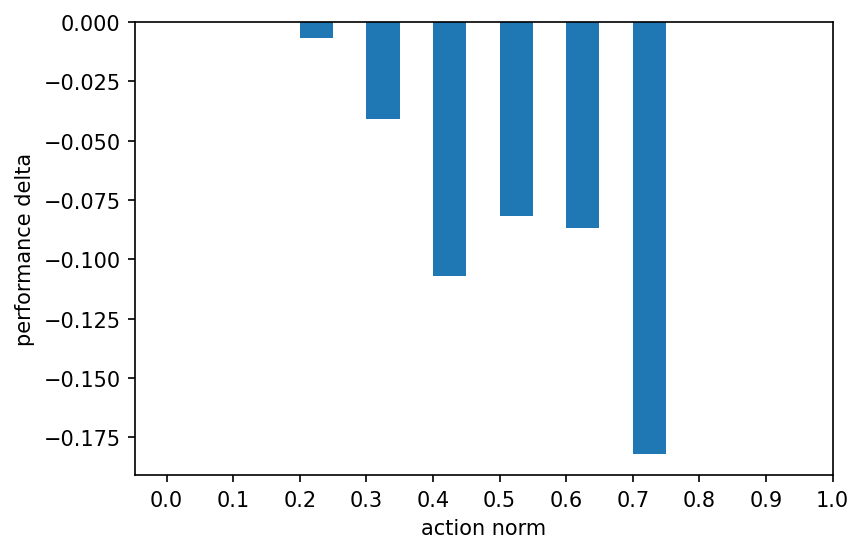

In [18]:
plot_by_ranking(action_norms, values_adv - values_clean, xlabel='action norm')

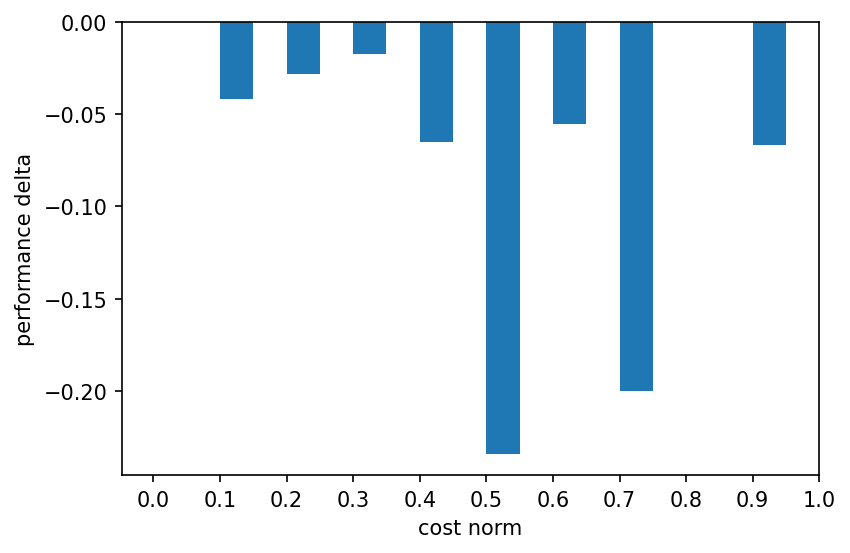

In [19]:
plot_by_ranking(cost_norms, values_adv - values_clean, xlabel='cost norm')

(array([ 92.,  95., 106., 114.,  76.,  46.,  17.,   9.,   5.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

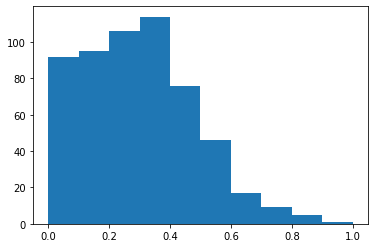

In [20]:
plt.hist(cost_norms)

(array([ 22., 124., 190., 113.,  61.,  28.,  14.,   5.,   2.,   2.]),
 array([0.11464154, 0.20317739, 0.29171323, 0.38024908, 0.46878492,
        0.55732077, 0.64585662, 0.73439246, 0.82292831, 0.91146415,
        1.        ]),
 <a list of 10 Patch objects>)

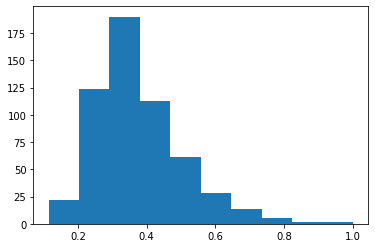

In [21]:
plt.hist(action_norms)

In [22]:
action_norms_std = np.clip((action_norms - action_norms.mean()) / action_norms.std(), -3, 3)
cost_norms_std = np.clip((cost_norms - cost_norms.mean()) / cost_norms.std(), -3, 3)

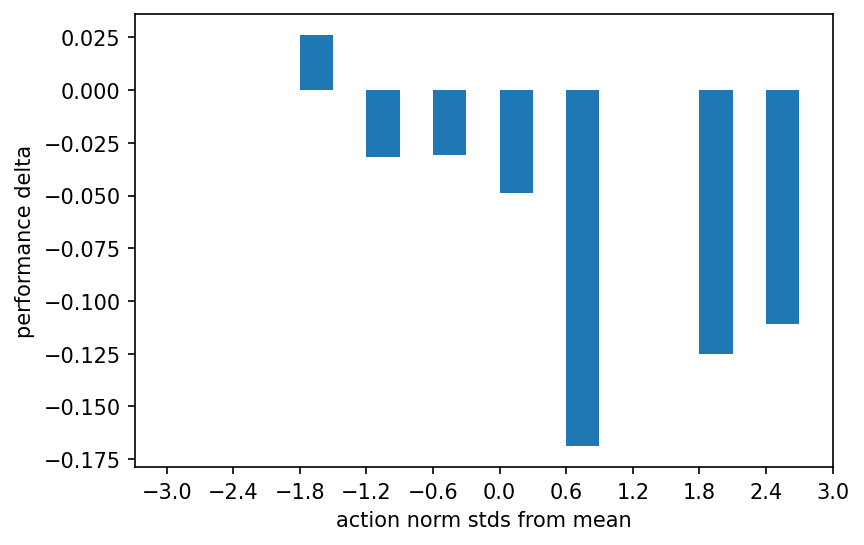

In [23]:
plot_by_ranking(action_norms_std, values_adv - values_clean, xlabel='action norm stds from mean')

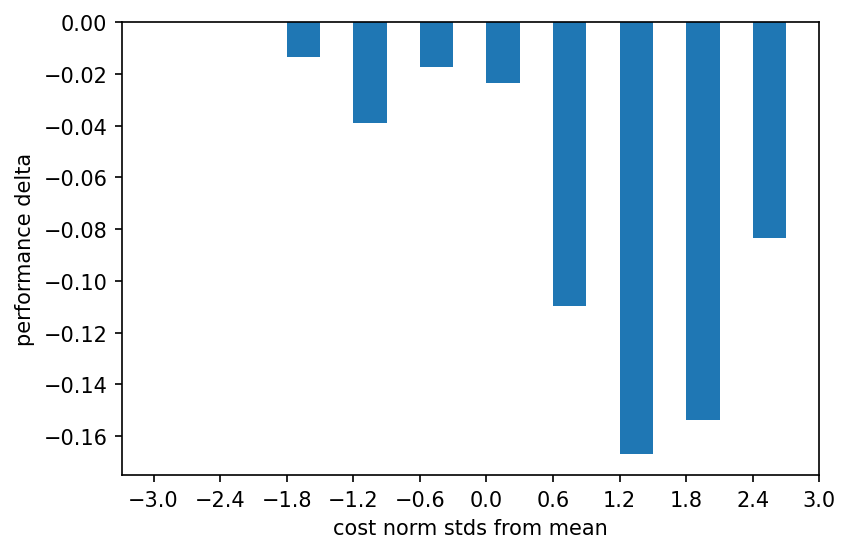

In [24]:
plot_by_ranking(cost_norms_std, values_adv - values_clean, xlabel='cost norm stds from mean')

# Checking the learning curves

Here I load the costs from the learning runs for the dreaming experiments.

In [168]:
import pandas as pd
import numpy as np

import json
from matplotlib import pyplot as plt

path = '/home/us441/nvidia-collab/vlad/results/refactored_test/dreaming_frequency_30/seed=1/logs.json'
with open(path, 'r') as f:
    d = json.load(f)

In [169]:
z_cost = d['custom']['z_cost']

In [170]:
len(z_cost)

67670

In [171]:
costs, t = zip(*z_cost)

In [172]:
df_cut = pd.DataFrame(d['custom']['z_cost_proximity'], columns=['val', 't'])

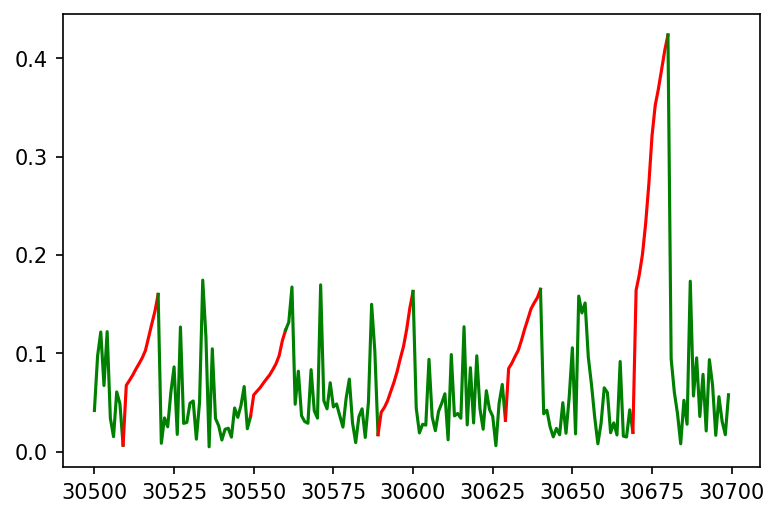

In [173]:
def draw(line_x, line_y, t):
    if len(line_x) == 0:
        return
    color_mapping = {'normal': 'g', 'adv': 'r'}
    c = color_mapping[t]
    plt.plot(line_x, line_y, c=c)
    
def plot(df, k):
    current_line_y = []
    current_line_x = []
    current_type = None
    for i, row in df.iterrows():
        if row['t'] != current_type:
            if current_type is not None:
                draw(current_line_x, current_line_y, current_type)
                current_line_y = [current_line_y[-1]]
                current_line_x = [current_line_x[-1]]
                
        current_type = row['t']
        current_line_y.append(row[k])
        current_line_x.append(i)
    draw(current_line_x, current_line_y, current_type)
    
plt.figure(dpi = 150)
plot(df_cut[30500:30700], 'val')

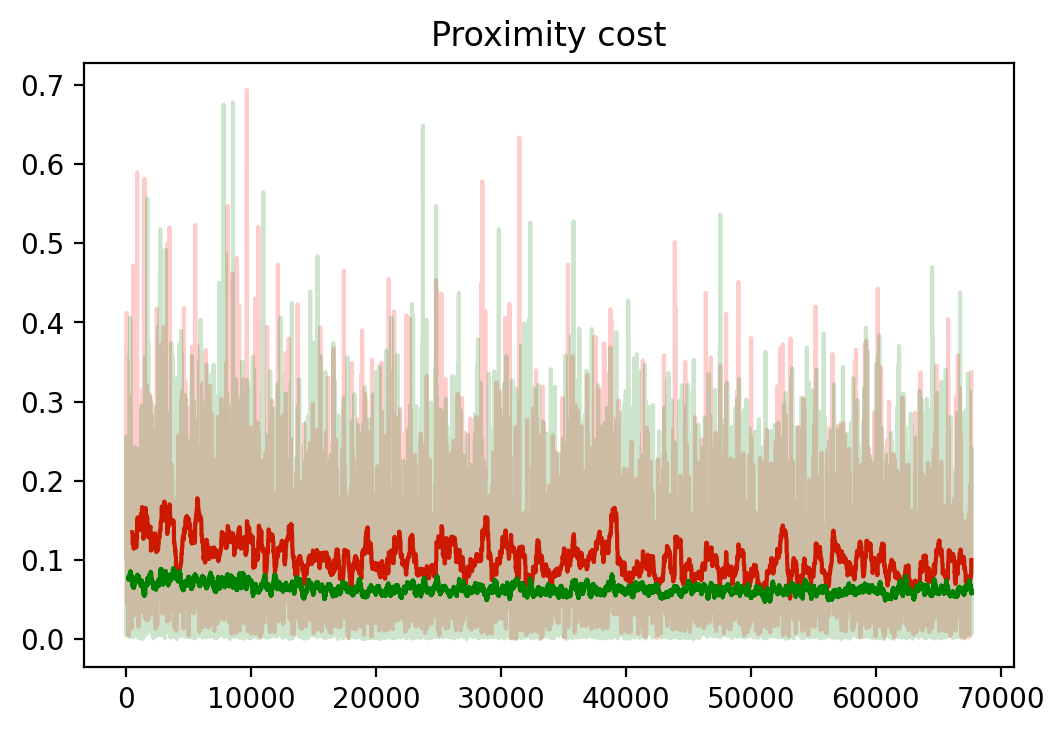

In [174]:
df_cut['val'].min()
plt.figure(dpi=200)
MEAN_WINDOW_SIZE = 140
plt.title('Proximity cost')
plt.plot(df_cut[df_cut['t'] == 'adv']['val'], c='r', alpha=0.2)
plt.plot(df_cut[df_cut['t'] == 'adv'].rolling(MEAN_WINDOW_SIZE).mean()['val'], c='r', alpha=1)
plt.plot(df_cut[df_cut['t'] == 'normal']['val'], c='g', alpha=0.2)
plt.plot(df_cut[df_cut['t'] == 'normal'].rolling(MEAN_WINDOW_SIZE).mean()['val'], c='g', alpha=1)